In [41]:
import pandas as pd
data = pd.read_csv('../data/X_pca.csv')

In [42]:
data.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4'], dtype='object')

In [43]:
pca_names = ['PCA 0', 'PCA 1', 'PCA 2', 'PCA 3', 'PCA 4']
data.drop('Unnamed: 0', axis=1, inplace=True)
data = data.set_axis(pca_names, axis='columns')
data.head()

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4
0,-0.512805,-0.901046,1.259283,-0.674767,0.540957
1,0.116355,-0.802172,0.120996,0.311998,-1.112654
2,1.176250,0.243660,1.759878,0.884328,1.426215
3,-1.088732,-2.103701,1.431497,0.461126,1.944950
4,0.152001,-1.672543,0.100160,-1.046537,-1.080376


In [44]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data = pd.DataFrame(mms.fit_transform(data), columns=pca_names)

data.describe()

,PCA 0,PCA 1,PCA 2,PCA 3,PCA 4
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,0.419500,0.390591,0.492213,0.480649,0.478123
std,0.108753,0.135026,0.150078,0.152900,0.140191
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.346970,0.300069,0.390511,0.376572,0.381106
50%,0.415198,0.387149,0.493442,0.484786,0.475606
75%,0.486074,0.476265,0.592384,0.583179,0.579177
max,1.000000,1.000000,1.000000,1.000000,1.000000


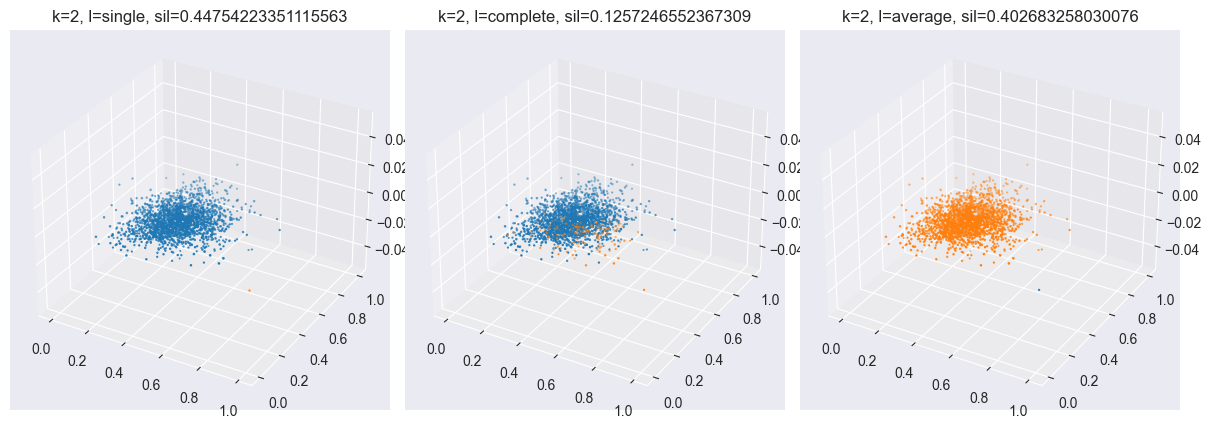

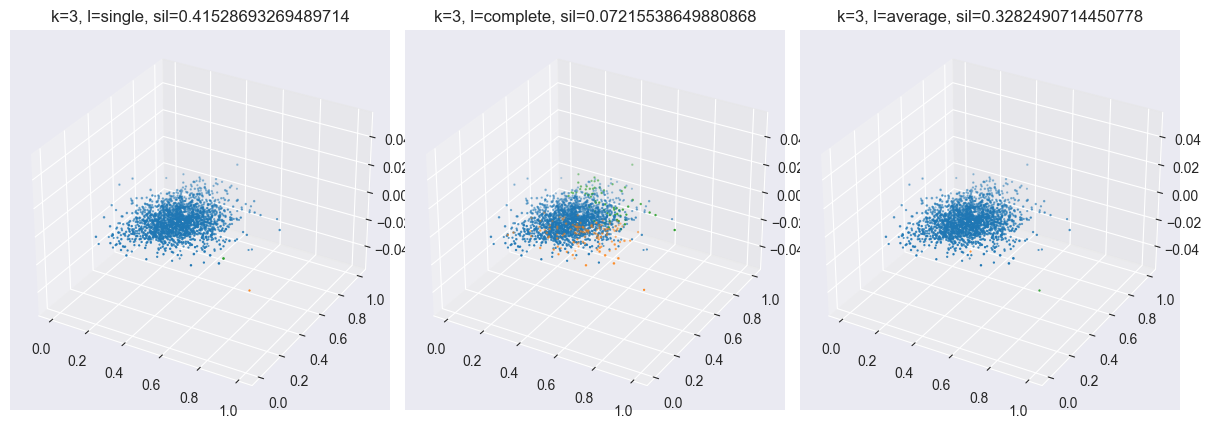

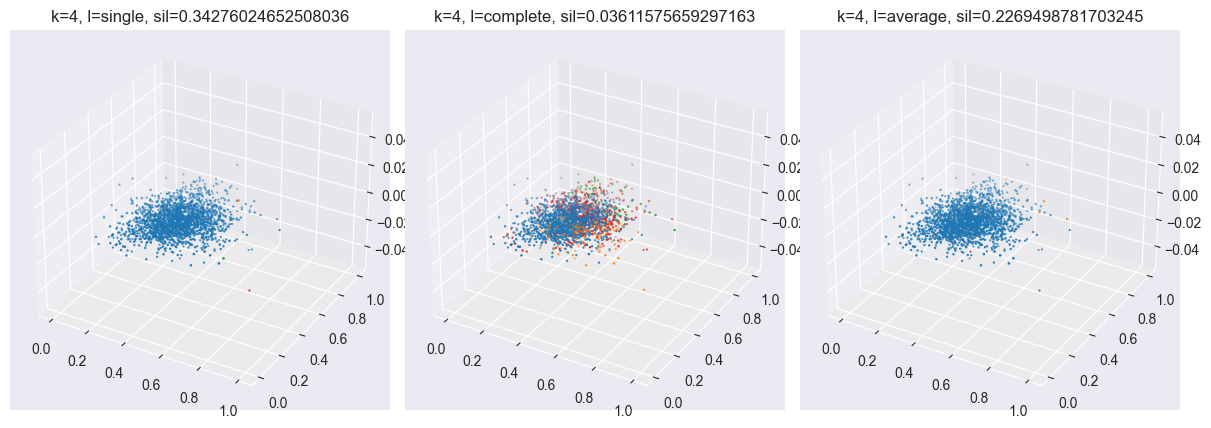

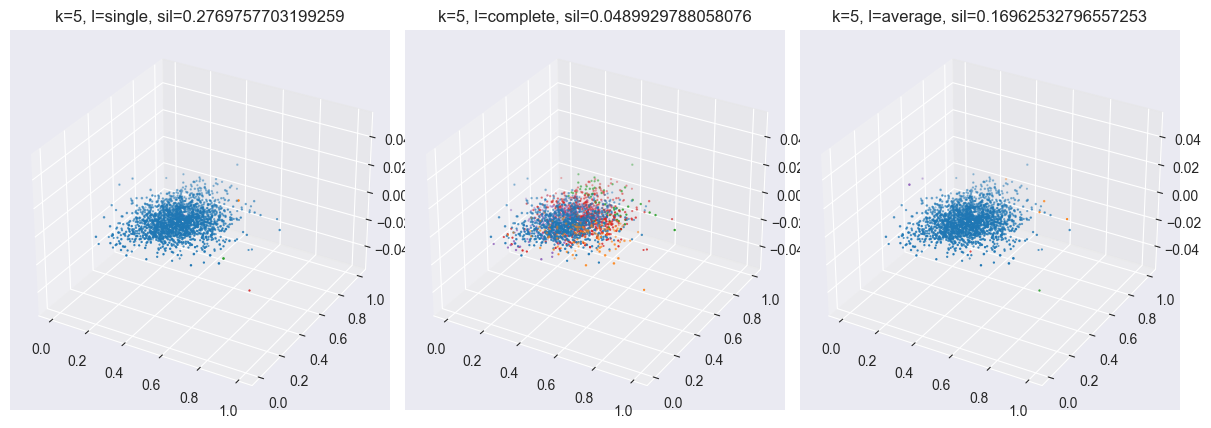

In [45]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

models = {}

for k in range(2, 6):
    linkages = ['single', 'complete', 'average']
    fig = plt.figure(figsize=(12,12))
    for idx, linkage in enumerate(linkages):
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        model.fit(data)
        
        fig.add_subplot(1, len(linkages), idx+1, projection='3d')
        
        for cluster_label in range(k):
            cluster = data[model.labels_ == cluster_label]
            plt.scatter(cluster['PCA 0'], cluster['PCA 1'], cluster['PCA 2'])
        plt.title(f'k={k}, l={linkage}, sil={silhouette_score(data, model.labels_)}')
        
        models[(k, linkage)] = model
        
    plt.tight_layout()
    plt.show()

In [46]:
# Cuvamo najbolji model (k = 2, l = single)
from helpers import save_model
save_model(models[(2, 'single')], '../../models/agglomerative.pkl')